# March 3rd Note - KNN (majoriy vs weighted voting)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array( [0.2, 3, 4.5, 4.6, 4.9, 5.2, 5.3, 5.5, 7.0, 9.5] )
x2 = np.array( [0.3, 2, 1.5, 3.6, 4.9, 2.2, 0.3, 2.5, 4.0, 2.5] )
y = ["*", "*", "+", "*", "+", "*", "+", "+", "*", "+"]

In [2]:
df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['y'] = y

pt_x1 = 4.2
pt_x2 = 1.8

target = np.array( [pt_x1, pt_x2] )

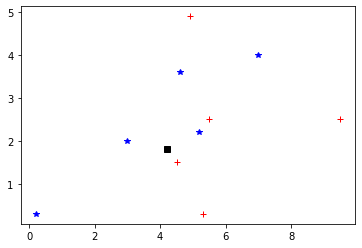

In [3]:
plt.plot( df[df['y'] == '+']['x1'], df[df['y'] == '+']['x2'], 'r+' )
plt.plot( df[df['y'] == '*']['x1'], df[df['y'] == '*']['x2'], 'b*' )
plt.plot( pt_x1, pt_x2, 'ks')
plt.show()

In [4]:
df

,x1,x2,y
0,0.2,0.3,*
1,3.0,2.0,*
2,4.5,1.5,+
3,4.6,3.6,*
4,4.9,4.9,+
5,5.2,2.2,*
6,5.3,0.3,+
7,5.5,2.5,+
8,7.0,4.0,*
9,9.5,2.5,+


In [5]:
target

array([4.2, 1.8])

In [6]:
# Since we need to multiply target and only x1 and x2 cols, we need to remove y col.
df_attributes = df[['x1', 'x2']]
df_attributes

,x1,x2
0,0.2,0.3
1,3.0,2.0
2,4.5,1.5
3,4.6,3.6
4,4.9,4.9
5,5.2,2.2
6,5.3,0.3
7,5.5,2.5
8,7.0,4.0
9,9.5,2.5


In [7]:
# Find Euclidiean Norm
df_attributes.apply( lambda x : x - target, axis=1 )

,x1,x2
0,-4.0,-1.5
1,-1.2,0.2
2,0.3,-0.3
3,0.4,1.8
4,0.7,3.1
5,1.0,0.4
6,1.1,-1.5
7,1.3,0.7
8,2.8,2.2
9,5.3,0.7


In [8]:
# you can do the same thing like this:
df_attributes - target

,x1,x2
0,-4.0,-1.5
1,-1.2,0.2
2,0.3,-0.3
3,0.4,1.8
4,0.7,3.1
5,1.0,0.4
6,1.1,-1.5
7,1.3,0.7
8,2.8,2.2
9,5.3,0.7


In [9]:
# examples of Norm - Manhatten Norm, Euclidean Norm...
(df_attributes - target).apply( np.linalg.norm )
# This is wrong...

x1    7.616430
x2    4.843552
dtype: float64

In [10]:
# We got 2 numbers which is wrong - need to put axis=1 (across cols)
(df_attributes - target).apply( np.linalg.norm, axis=1 )
# These numbers indicate the distances from the target to each point

0    4.272002
1    1.216553
2    0.424264
3    1.843909
4    3.178050
5    1.077033
6    1.860108
7    1.476482
8    3.560899
9    5.346027
dtype: float64

# March 5th Note Continues

In [11]:
# Concat the result with df
df['distance'] = (df_attributes - target).apply( np.linalg.norm, axis=1 )
df

,x1,x2,y,distance
0,0.2,0.3,*,4.272002
1,3.0,2.0,*,1.216553
2,4.5,1.5,+,0.424264
3,4.6,3.6,*,1.843909
4,4.9,4.9,+,3.178050
5,5.2,2.2,*,1.077033
6,5.3,0.3,+,1.860108
7,5.5,2.5,+,1.476482
8,7.0,4.0,*,3.560899
9,9.5,2.5,+,5.346027


In [12]:
# returns index of the smallest distance. (We don't need this unless k=1, but the professor told us since it's useful function)
np.argmin( df['distance'] )

2

In [13]:
# calculate the weight
df['weight'] = 1/(df['distance'] * df['distance'])
df

,x1,x2,y,distance,weight
0,0.2,0.3,*,4.272002,0.054795
1,3.0,2.0,*,1.216553,0.675676
2,4.5,1.5,+,0.424264,5.555556
3,4.6,3.6,*,1.843909,0.294118
4,4.9,4.9,+,3.178050,0.099010
5,5.2,2.2,*,1.077033,0.862069
6,5.3,0.3,+,1.860108,0.289017
7,5.5,2.5,+,1.476482,0.458716
8,7.0,4.0,*,3.560899,0.078864
9,9.5,2.5,+,5.346027,0.034990


In [14]:
# We need to sort the array by distance to find k=5.
df_sorted = df.sort_values(by='distance')
df_sorted
# Note the index of the result is sticky to the rows. (There's some situation where you should reset the index.)

,x1,x2,y,distance,weight
2,4.5,1.5,+,0.424264,5.555556
5,5.2,2.2,*,1.077033,0.862069
1,3.0,2.0,*,1.216553,0.675676
7,5.5,2.5,+,1.476482,0.458716
3,4.6,3.6,*,1.843909,0.294118
6,5.3,0.3,+,1.860108,0.289017
4,4.9,4.9,+,3.178050,0.099010
8,7.0,4.0,*,3.560899,0.078864
0,0.2,0.3,*,4.272002,0.054795
9,9.5,2.5,+,5.346027,0.034990


In [15]:
# Slice the first 5 rows (bc k=5 here)
df_5 = df_sorted[0:5]
df_5

,x1,x2,y,distance,weight
2,4.5,1.5,+,0.424264,5.555556
5,5.2,2.2,*,1.077033,0.862069
1,3.0,2.0,*,1.216553,0.675676
7,5.5,2.5,+,1.476482,0.458716
3,4.6,3.6,*,1.843909,0.294118


In [16]:
# Note that * wins with 3 votes over + with 2 votes
df_5['y'].value_counts()

*    3
+    2
Name: y, dtype: int64

In [17]:
# 
df_5['y'].value_counts().index[0]

'*'

In [18]:
# mode() will do the same thing as above.
df_5['y'].mode()[0]

'*'

In [19]:
# who wins if we do weighted voting?
df_5[ df_5['y'] == '+']['weight'].sum()

6.014271151885833

In [20]:
df_5[ df_5['y'] == '*']['weight'].sum()
# In weighted voting, + wins with k=5!

1.83186228825174